# Communicate-Data-Finding-Exploration-with-Ford-GoBike-System-Data

## Preliminary Wrangling

* I chose Ford GoBike System Data : https://www.fordgobike.com/system-data as my source data 
* This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco
Bay area.
* Multiple data files will need to be joined together if a full year’s coverage is desired.
* The features included in the dataset : 
Trip Duration (seconds) , Start Time and Date , End Time and Date , Start Station ID , Start Station Name , Start Station Latitude , Start Station Longitude , End Station ID , End Station Name, End Station Latitude , End Station Longitude , Bike ID , User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) , Member Year of Birth, Member Gender

![title](images/bike_picture.png)

In [1]:
# importing needed libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Here we have 12 files of each month datas of bike sharing in .csv files
and we make them into one .csv file

In [2]:
# concatenate 12 files of each month in one dataset
path = './Ford_Go_Bike_Dataset/'
files = [file for file in os.listdir(path) if not file.startswith('.')]
all_data = pd.DataFrame()
for file in files:
    cur_file = pd.read_csv(path+file)
    all_data = pd.concat([all_data, cur_file])
# for saving the data :
#all_data.to_csv('all_datas.csv', index=False)

In [3]:
data = pd.read_csv('all_datas.csv')
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [4]:
data.shape

(1863721, 16)

we do some cleaning in data cause some columns are not needed

In [5]:
data = data.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'],
                axis=1)

In [6]:
data.shape

(1863721, 12)

In [7]:
# check null values
data.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
end_station_id              11771
end_station_name            11771
bike_id                         0
user_type                       0
member_birth_year          110718
member_gender              110367
bike_share_for_all_trip         0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 12 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
end_station_id             float64
end_station_name           object
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(3), int64(2), object(7)
memory usage: 170.6+ MB


In [9]:
data.nunique()

duration_sec                 16709
start_time                 1863584
end_time                   1863610
start_station_id               331
start_station_name             348
end_station_id                 331
end_station_name               348
bike_id                       5054
user_type                        2
member_birth_year               86
member_gender                    3
bike_share_for_all_trip          2
dtype: int64

In [10]:
#we change type of datas that have less number of unique values to decrease memory usage
data['user_type'] = data['user_type'].astype('category')
data['member_gender'] = data['member_gender'].astype('category')
data['bike_share_for_all_trip'] = data['bike_share_for_all_trip'].astype('category')

dataset decreased to 33 Mb

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 12 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
end_station_id             float64
end_station_name           object
bike_id                    int64
user_type                  category
member_birth_year          float64
member_gender              category
bike_share_for_all_trip    category
dtypes: category(3), float64(3), int64(2), object(4)
memory usage: 133.3+ MB


### The following questions are of my interest

 1. How long does the average trip take?
 2. Is the trip duration affected by weather( months/seasons)
 3. Does the above depend on if a user is a subscriber or customer?


## Univariate Exploration

> In this section, investigate distributions of individual variables.

**Question 1** : I want to know is " How long does the average trip take?" 

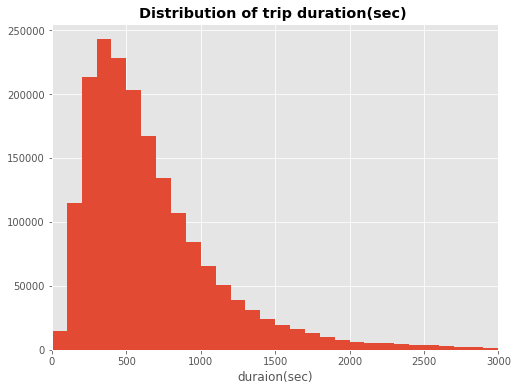

In [12]:
# Let's plot the distribution of trip duration.
plt.figure(figsize=(8,6))
bins = np.arange(0, data['duration_sec'].max()+100, 100)
plt.hist(x=data['duration_sec'], bins=bins)
plt.xlim(0,3000)
plt.title('Distribution of trip duration(sec) ', weight='bold')
plt.xlabel('duraion(sec)')
#plt.savefig('duration_sec.png', dpi=300)
plt.show()

> It is right screwed with a long tail on the right. I am going to add log transformation to x axis.  
 
> It is really difficult to look at the plot. I had to increase the bin width to 100 to let the plot show. Measuring trip using seconds is not reasonable.  I would change the "duration_sec" to "duration_min" before I add any log transformation . 

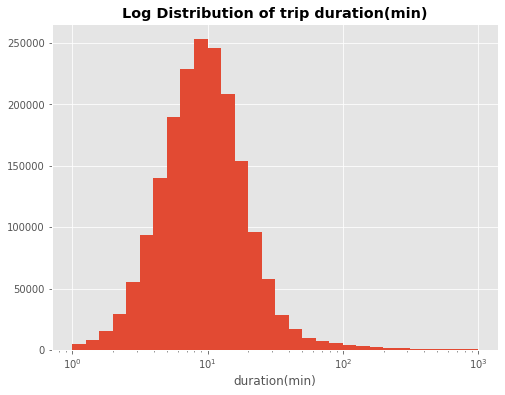

In [13]:
data['duration_min'] = data['duration_sec'] / 60
plt.figure(figsize=(8,6))
bins = 10**np.arange(0, 3+0.1, 0.1)
plt.hist(x=data['duration_min'], bins=bins)
plt.xscale('log') #making log scales
plt.title('Log Distribution of trip duration(min)', weight='bold')
plt.xlabel('duration(min)')
#plt.savefig('duration_min.png', dpi=300)
plt.show()

we can see through the plot, most people tend to use the bikes for short-time trips ( around 10 mins).
Does weather affect the trip duration ?  ( compare trip duration difference of spring, summer autumn, winter )

## Bivariate Exploration

> In this section, I would investigate relationships between pairs of variables in the data. 

In [14]:
# we need month form datas so we do it with datetime
data['start_time'] = pd.to_datetime(data['start_time'])
data['month_start'] = data['start_time'].dt.month

In [15]:
data['month_start'].value_counts()

10    201458
7     199222
6     195968
8     192162
9     186217
5     179125
11    134135
12    131363
4     131169
3     111382
2     106718
1      94802
Name: month_start, dtype: int64

In [16]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,month_start
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,285.0,Webster St at O'Farrell St,2765,Subscriber,1986.0,Male,No,1254.733333,1
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,15.0,San Francisco Ferry Building (Harry Bridges Pl...,2815,Customer,NaN,NaN,No,1423.700000,1
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,296.0,5th St at Virginia St,3039,Customer,1996.0,Male,No,1192.933333,1
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,47.0,4th St at Harrison St,321,Customer,NaN,NaN,No,1017.933333,1
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,19.0,Post St at Kearny St,617,Subscriber,1991.0,Male,No,666.100000,1


**Question 2** : Does weather(month) affect the trip duration ? 

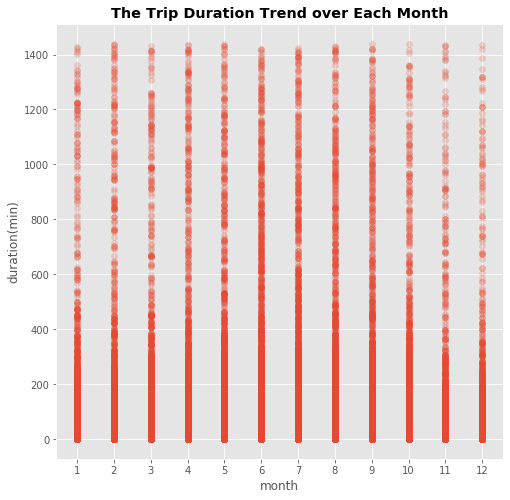

In [17]:
plt.figure(figsize=(8,8))
plt.scatter(data['month_start'], data['duration_min'], alpha=0.2)
plt.title('The Trip Duration Trend over Each Month', weight='bold')
plt.ylabel('duration(min)')
plt.xlabel('month')
plt.xticks([i for i in range(1,13)])
#plt.savefig('duration_month.png', dpi=300)
plt.show()

In [18]:
spring = data.query('month_start in ["3","4","5"]')['duration_min'].mean()
summer = data.query('month_start in ["6","7","8"]')['duration_min'].mean()
fall = data.query('month_start in ["9","10","11"]')['duration_min'].mean()
winter = data.query('month_start in ["12","1","2"]')['duration_min'].mean()

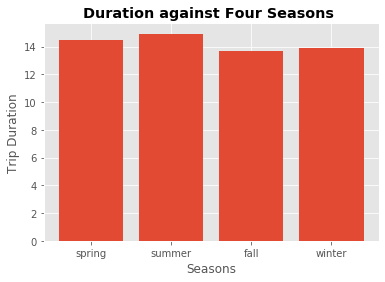

In [19]:
plt.figure(figsize=(6,4))
plt.bar(['spring','summer','fall','winter'],[spring , summer , fall , winter] )
plt.title('Duration against Four Seasons ', weight='bold')
plt.xlabel('Seasons')
plt.ylabel('Trip Duration')
#plt.savefig('duration_season.png', dpi=300)
plt.show()

* As we expected, summer has the longest trip duration , with average above 14 mins. 
* But there is no significant difference of trip duration in terms of four seasons.
It is probably because the weather in San Francisco bay area does not change that much.
* What surprised me the most is fall has the lowest trip duration in 2018. 
Fall is most likely to experience good weather with pleasant average temperatures in SF. 
People are more likely to go out and exercise . 
* After checking the news, it is likely caused by Wildfires in Northern California(11/9/2018) 
which lead to the worst air quality in SF for months.


> The weather does affect trip duration, but the affect is very limited. Unlike cities like Boston, New York, which have very different four seasons, the weather in SF does not change that much. 

> What surprised me is that the lower mean trip durations occur in Spring and Fall. In terms of Fall, one reason could be that the air quality in fall 2018 SF was really bad, which prevented more people doing outdoor activities. 
What could be the potential factor for lower trip duration in Spring  ? I want to see if the user type could be a reason. 

## Multivariate Exploration

> Create plots of three or more variables to investigate the data even further.The investigations are justified, and follow from my work in the previous sections.

**Question 3** : Does user type lead to the lower trip duration  ? 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


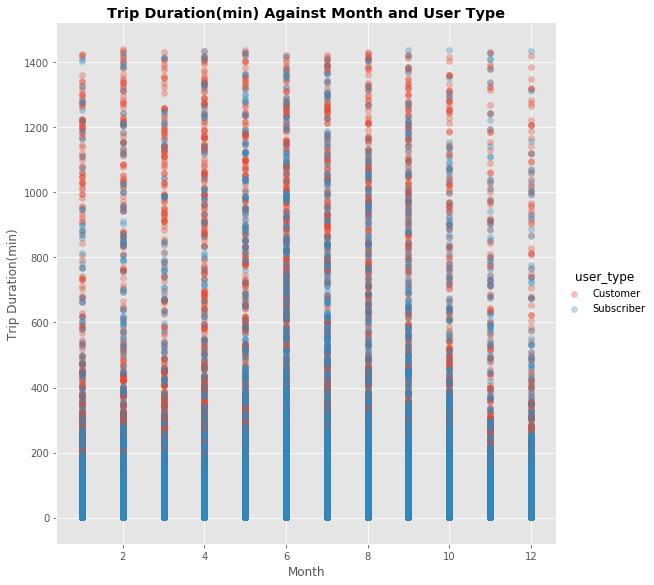

In [20]:
# I want to find out if user type lead to the lower trip duration
fig = sns.FacetGrid(data=data, hue='user_type', size=8)
fig.map(plt.scatter, 'month_start', 'duration_min', alpha=1/3)
fig.add_legend()
plt.title('Trip Duration(min) Against Month and User Type', weight='bold')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)')
#plt.savefig('duration_usertype.png', dpi=300)
plt.show()